In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os
import csv
import datetime
from glob import glob

# Replace 'base_directory_pattern' with the path to the directory containing subfolders like '1697435524_A044DF'
# Use * as a wildcard for the numerical identifier
base_directory_pattern = r'C:\Users\anilp\Project_Files\*_A044DF'

# Initialize empty lists to store the extracted values
eda_values = []
hr_values = []

# Get a list of folders matching the pattern
matching_folders = glob(base_directory_pattern)

# Loop through the matching folders
for matching_folder in matching_folders:
    # Look for the 'EDA.csv' and 'BVP.csv' files in the folder
    eda_file_path = os.path.join(matching_folder, 'EDA.csv')
    hr_file_path = os.path.join(matching_folder, 'HR.csv')

    # Check if both files exist before processing
    if os.path.exists(eda_file_path) and os.path.exists(hr_file_path):
        # Open and read the 'EDA.csv' file
        with open(eda_file_path, 'r', newline='') as eda_csv_file:
            eda_csv_reader = csv.reader(eda_csv_file)

            # Extract values from the 'EDA.csv' file
            eda_values.extend([row[0] for row in eda_csv_reader][2:])

        # Open and read the 'HR.csv' file
        with open(hr_file_path, 'r', newline='') as hr_csv_file:
            hr_csv_reader = csv.reader(hr_csv_file)

            # Extract values from the 'HR.csv' file
            hr_values.extend([row[0] for row in hr_csv_reader][2:])

# Create dataframes for 'EDA' and 'HR'
df_eda = pd.DataFrame({'EDA': eda_values})
df_hr = pd.DataFrame({'HR': hr_values})

# Convert 'EDA' column in df_eda to numeric
df_eda['EDA'] = pd.to_numeric(df_eda['EDA'], errors='coerce')

# Convert 'HR' column in df_hr to numeric
df_hr['HR'] = pd.to_numeric(df_hr['HR'], errors='coerce')

# Display the dataframes
print("DataFrame for EDA:")
print(df_eda)

print("\nDataFrame for HR:")
print(df_hr)

DataFrame for EDA:
             EDA
0       0.000000
1       0.832765
2       1.180231
3       1.618462
4       2.096440
...          ...
713275  0.107612
713276  0.108894
713277  0.108894
713278  0.110175
713279  0.110175

[713280 rows x 1 columns]

DataFrame for HR:
           HR
0       55.00
1       69.00
2       65.33
3       68.50
4       73.40
...       ...
178000  87.12
178001  87.03
178002  87.02
178003  87.03
178004  87.18

[178005 rows x 1 columns]


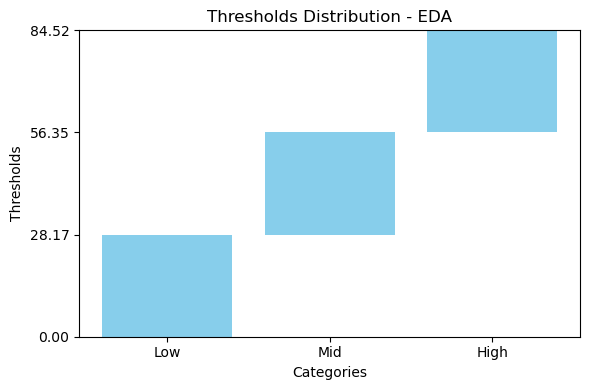

In [10]:
# Define category labels
category_labels = ['Low', 'Mid', 'High']

#Define the min and max of EDA
eda_min = df_eda['EDA'].min()
eda_max = df_eda['EDA'].max()

# Define the category thresholds
num_categories = 3

thresholds = [eda_min]
thresholds.extend([eda_min + (i + 1) * ((eda_max - eda_min) / num_categories) for i in range(num_categories - 1)])
thresholds.append(eda_max)

# Create bar plots for EDA with threshold lines
plt.figure(figsize=(6, 4))

plt.bar(category_labels, [thresholds[i + 1] - thresholds[i] for i in range(num_categories)],
        bottom=thresholds[:-1], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Thresholds')
plt.title('Thresholds Distribution - EDA')
plt.ylim(eda_min, eda_max)
plt.yticks(thresholds)

plt.tight_layout()
plt.show()

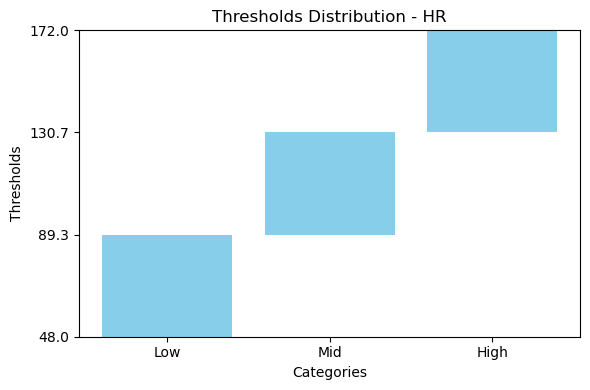

In [11]:
#Define the min and max of HR
hr_min = df_hr['HR'].min()
hr_max = df_hr['HR'].max()

# Define the category thresholds
thresholds = [hr_min]
thresholds.extend([hr_min + (i + 1) * ((hr_max - hr_min) / num_categories) for i in range(num_categories - 1)])
thresholds.append(hr_max)

# Create bar plots for EDA with threshold lines
plt.figure(figsize=(6, 4))

plt.bar(category_labels, [thresholds[i + 1] - thresholds[i] for i in range(num_categories)],
        bottom=thresholds[:-1], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Thresholds')
plt.title('Thresholds Distribution - HR')
plt.ylim(hr_min, hr_max)
plt.yticks(thresholds)

plt.tight_layout()
plt.show()

In [12]:
print(eda_min)
print(eda_max)

print(hr_min)
print(hr_max)

0.0
84.52076
48.0
172.03


In [18]:
#export df_result to folder with timestamp
parent_folder = 'C:/Users/anilp/Project_Files'

current_datetime = datetime.datetime.now()
timestamp = current_datetime.strftime('%d-%m-%Y %Hh%Mm%Ss')

new_folder = os.path.join(parent_folder, timestamp)
os.makedirs(new_folder, exist_ok=True) 
csv_file_path = os.path.join(new_folder, 'df_all_eda.csv')

df_eda.to_csv(csv_file_path, index=False)
print(f"Data exported to {csv_file_path}")

Data exported to C:/Users/anilp/Project_Files\23-11-2023 11h59m03s\df_all_eda.csv
